In [170]:
import numpy as np
from matplotlib import pyplot as pl
import ipywidgets
%matplotlib inline


#set parameter
x_l = 2.0
p_l = 10.0
umax = 1.0
pmax = 10.0
nx = 81
L = 4.0



dx = L / (nx - 1)
sigma = 1
dt = sigma * dx / umax

In [171]:
def velocity (p, umax, pmax):
    u = umax * (1 - p/pmax)
    return u

In [173]:
def flux(p, umax, pmax):
    F = p * umax * (1 - p / pmax)
    return F

In [174]:
x = np.linspace(0.0, L, num = nx)

def ic(x, p_l, x_l):
    p0 = np.zeros_like(x)
    mask = np.where((x>=0.0)&(x<x_l))
    p0[mask] = p_l * x[mask] / x_l
    return p0
print(p0)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [186]:
def ftbs(p0, nt, dt, dx, umax, pmax):
    p_hist = [p0.copy()]
    p = p0.copy()
    for n in range(nt):
        F = flux(p, umax, pmax)
        p[1:] = p[1:] - dt * (F[1:] - F[:-1]) / dx
        p_hist.append(p.copy())
    return p_hist

In [187]:
p0 = pgl(x, p_l, x_l)
p_hist = ftbs(p0, 30, dt, dx, umax, pmax)
print(p_hist[0])

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75
 7.   7.25 7.5  7.75 8.   8.25 8.5  8.75 9.   9.25 9.5  9.75 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [177]:
def plot(n, x , p_hist):
    pl.figure()
    pl.title('time step:{}'.format(n))
    pl.xlabel('road')
    pl.ylabel('traffic density')
    pl.grid()
    pl.plot(x, p_hist[n], color='C0', linestyle='-', linewidth=2)
    pl.xlim(x[0], x[-1])
    pl.ylim(-0.5, 11.0)
    pl.show()

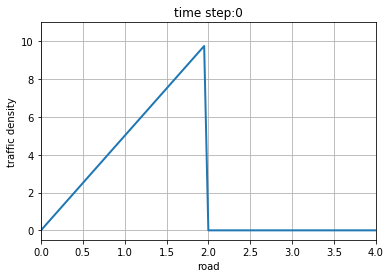

In [188]:
plot(0, x, p_hist)

In [179]:
def interactive_plot(x, p_hist):
    nt = len(p_hist)-1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), p_hist=ipywidgets.fixed(p_hist))
    return w

interactive(children=(IntSlider(value=0, description='time step', max=30), Output()), _dom_classes=('widget-in…

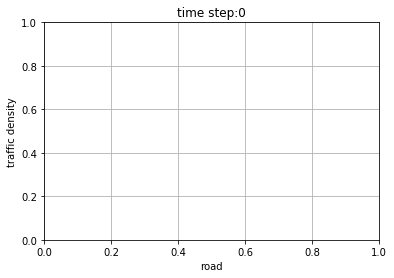

In [180]:
interactive_plot(x,p_hist)